# Logistic Regression

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
import pandas as pd
dat=pd.read_csv("hmelq.csv")
data_model=dat.copy()
data_model=data_model.dropna()

In [4]:
dms=pd.get_dummies(data_model[["job","reason"]])
dms.head()

,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self,reason_DebtCon,reason_HomeImp
153,1,0,0,0,0,0,1,0
154,1,0,0,0,0,0,1,0
155,1,0,0,0,0,0,1,0
156,1,0,0,0,0,0,0,1
157,1,0,0,0,0,0,1,0


In [5]:
y=data_model["bad"]
X_=data_model.drop(["job","reason","bad"],axis=1)
X=pd.concat([X_,dms[["job_Mgr","job_Office","job_Other","job_ProfEx","job_Sales","reason_DebtCon"]]],axis=1)
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,reason_DebtCon
153,18200,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056,1,0,0,0,0,1
154,21700,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079,1,0,0,0,0,1
155,34100,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459,1,0,0,0,0,1
156,8400,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200,1,0,0,0,0,0
157,17400,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108,1,0,0,0,0,1


# statsmodels

In [7]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [8]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
loj=sm.Logit(y_train,X_train)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.242501
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1598
Method:                           MLE   Df Model:                           15
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1897
Time:                        19:42:20   Log-Likelihood:                -391.40
converged:                       True   LL-Null:                       -483.05
Covariance Type:            nonrobust   LLR p-value:                 5.126e-31
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan           -2.976e-05   1.19e-05     -2.504      0.012   -5.31e-05   -6.46e-06
mortdue        -1.942e-06   5.19e-06     -0.374      0.708   -1.21e-05    8.24e-06
value           9.806e-07   4.52e-06      0.217      0.828   -7.87e-06    9.84e-06
yoj               -0.0149      0.015     -1.014      0.310      -0.044       0.014
derog              0.5451      0.149      3.646      0.000       0.252       0.838
delinq             0.7886      0.102      7.719      0.000       0.588       0.989
clage             -0.0064      0.002     -4.237      0.000      -0.009      -0.003
ninq               0.0866      0.051      1.709      0.087      -0.013       0.186
clno              -0.0357      0.012     -3.053      0.002      -0.059      -0.013
debtinc            0.0631      0.011      5.667      0.000       0.041       0.085
job_Mgr           -2.5085      0.396     -6.341      0.000      -3.284      -1.733
job_Office        -3.0032      0.415     -7.240      0.000      -3.816      -2.190
job_Other         -2.7573      0.344     -8.025      0.000      -3.431      -2.084
job_ProfEx        -2.5386      0.365     -6.950      0.000      -3.254      -1.823
job_Sales         -2.0808      0.771     -2.699      0.007      -3.592      -0.570
reason_DebtCon    -0.0382      0.214     -0.179      0.858      -0.457       0.380
==================================================================================
"""

In [9]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,5.307816,loan
1,18.882950,mortdue
2,23.532982,value
3,2.729098,yoj
4,1.153330,derog
5,1.176896,delinq
6,6.159462,clage
7,1.573974,ninq
8,7.899643,clno
9,15.641711,debtinc


In [10]:
remove=vif["features"].iloc[:][vif["VIF Factor"]>10]
remove

1    mortdue
2      value
9    debtinc
Name: features, dtype: object

In [11]:
X_train=X_train.drop(["value","mortdue","yoj","ninq","reason_DebtCon"],axis=1)

In [12]:
loj=sm.Logit(y_train,X_train)
loj_model=loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.243753
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1614
Model:                          Logit   Df Residuals:                     1603
Method:                           MLE   Df Model:                           10
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1856
Time:                        19:42:21   Log-Likelihood:                -393.42
converged:                       True   LL-Null:                       -483.05
Covariance Type:            nonrobust   LLR p-value:                 3.335e-33
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan        -2.98e-05   1.04e-05     -2.872      0.004   -5.01e-05   -9.46e-06
derog          0.5905      0.145      4.065      0.000       0.306       0.875
delinq         0.7730      0.099      7.788      0.000       0.578       0.967
clage         -0.0071      0.001     -4.901      0.000      -0.010      -0.004
clno          -0.0360      0.011     -3.235      0.001      -0.058      -0.014
debtinc        0.0639      0.011      5.973      0.000       0.043       0.085
job_Mgr       -2.5034      0.375     -6.669      0.000      -3.239      -1.768
job_Office    -3.0132      0.394     -7.654      0.000      -3.785      -2.242
job_Other     -2.7523      0.317     -8.670      0.000      -3.375      -2.130
job_ProfEx    -2.5810      0.350     -7.367      0.000      -3.268      -1.894
job_Sales     -2.0790      0.756     -2.751      0.006      -3.560      -0.598
==============================================================================
"""

In [13]:
X_test=X_test.drop(["value","mortdue","yoj","ninq","reason_DebtCon"],axis=1)

## sklearn

In [15]:
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [16]:
accuracy_score(y_train,loj_model.predict(X_train))

0.9206939281288724

In [17]:
confusion_matrix(y_train,loj_model.predict(X_train))

array([[1468,    3],
       [ 125,   18]], dtype=int64)

In [20]:
print(classification_report(y_train,loj_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1471
           1       0.86      0.13      0.22       143

    accuracy                           0.92      1614
   macro avg       0.89      0.56      0.59      1614
weighted avg       0.92      0.92      0.89      1614



In [18]:
y_pred=loj_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9232673267326733

In [17]:
confusion_matrix(y_test,y_pred)

array([[368,   1],
       [ 30,   5]], dtype=int64)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       369
           1       0.83      0.14      0.24        35

    accuracy                           0.92       404
   macro avg       0.88      0.57      0.60       404
weighted avg       0.92      0.92      0.90       404



In [19]:
loj_model.predict_proba(X_test)[0:10]

array([[0.96754999, 0.03245001],
       [0.95768171, 0.04231829],
       [0.93657609, 0.06342391],
       [0.98491986, 0.01508014],
       [0.79082213, 0.20917787],
       [0.84187626, 0.15812374],
       [0.89381823, 0.10618177],
       [0.9594902 , 0.0405098 ],
       [0.99431085, 0.00568915],
       [0.96596545, 0.03403455]])

In [20]:
y_probs=loj_model.predict_proba(X_test)
y_probs=y_probs[:,1]
y_pred2=[1 if i>0.4 else 0 for i in y_probs]


In [21]:
confusion_matrix(y_test,y_pred2)

array([[367,   2],
       [ 29,   6]], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       369
           1       0.75      0.17      0.28        35

    accuracy                           0.92       404
   macro avg       0.84      0.58      0.62       404
weighted avg       0.91      0.92      0.90       404



In [21]:
y_probs=loj_model.predict_proba(X_test)
y_probs=y_probs[:,1]
y_pred3=[1 if i>0.2 else 0 for i in y_probs]

In [22]:
confusion_matrix(y_test,y_pred3)

array([[340,  29],
       [ 20,  15]], dtype=int64)

In [24]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       369
           1       0.34      0.43      0.38        35

    accuracy                           0.88       404
   macro avg       0.64      0.67      0.66       404
weighted avg       0.89      0.88      0.88       404



In [26]:
cross_val_score(loj_model,X_test,y_test, cv=10).mean()

0.9209756097560975

In [27]:
cross_val_score(loj_model,X_train,y_train, cv=10).mean()

0.9200674794877692

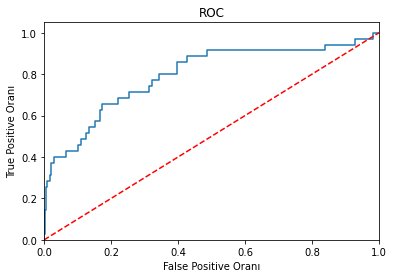

In [28]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
logit_roc_auc=roc_auc_score(y_test,loj_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

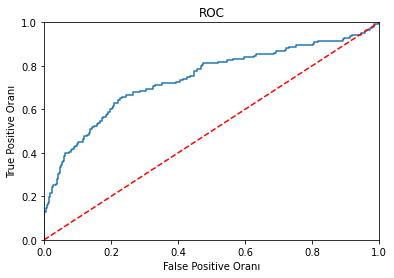

In [29]:
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
logit_roc_auc=roc_auc_score(y_train,loj_model.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, loj_model.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()